<a href="https://colab.research.google.com/github/vageeshmaiya/Darts/blob/main/n_beats.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
pip install darts

In [ ]:
from os.path import dirname, basename
from os import getcwd
import sys


def fix_pythonpath_if_working_locally():
    """Add the parent path to pythonpath if current working dir is darts/examples"""
    cwd = getcwd()
    if basename(cwd) == 'examples':
        sys.path.insert(0, dirname(cwd))

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from darts import TimeSeries
from darts.models import NBEATSModel
from darts.dataprocessing.transformers import Scaler, MissingValuesFiller
from darts.metrics import mape, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
path = "/content/drive/MyDrive/dataset4.csv"
df = pd.read_csv(path)

In [ ]:
df.head()

,Date_Time,Charge_Capacity(Ah),Voltage(V)
0,01/27/2018 15:48:10.000,0.0,3.393696
1,01/27/2018 15:50:10.000,0.0,3.394385
2,01/27/2018 15:52:10.000,0.0,3.394773
3,01/27/2018 15:54:10.000,0.0,3.395056
4,01/27/2018 15:56:10.000,0.0,3.395251


In [ ]:
df.dropna(inplace=True)

In [ ]:
df['Date_Time'] = pd.to_datetime(df['Date_Time'])

In [ ]:
df.head()

,Date_Time,Charge_Capacity(Ah),Voltage(V)
0,2018-01-27 15:48:10,0.0,3.393696
1,2018-01-27 15:50:10,0.0,3.394385
2,2018-01-27 15:52:10,0.0,3.394773
3,2018-01-27 15:54:10,0.0,3.395056
4,2018-01-27 15:56:10,0.0,3.395251


In [ ]:
ser = TimeSeries.from_dataframe(df=df,time_col="Date_Time")

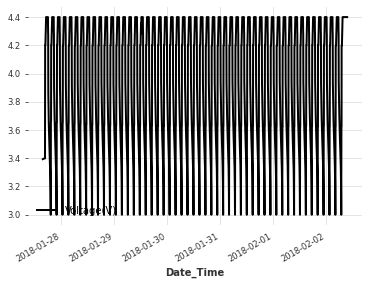

In [ ]:
scaler_en = Scaler()
series_en_transformed = scaler_en.fit_transform(ser['Voltage(V)'])
train, val = series_en_transformed.split_after(pd.Timestamp('1/30/2018  10:26:10 AM'))
#series_en_transformed.plot()
scaler_en.inverse_transform(series_en_transformed).plot()

In [ ]:
model_nbeats = NBEATSModel(
    input_chunk_length=300,
    output_chunk_length=28,
    generic_architecture=True,
    num_stacks=10,
    num_blocks=1,
    num_layers=4,
    layer_widths=512,
    n_epochs=500,
    nr_epochs_val_period=1,
    batch_size=16,
    model_name='nbeats_run',
    force_reset=True
)

In [ ]:
model_nbeats.fit(train, val_series=val, verbose=True)

[2021-12-17 10:10:19,200] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1673 samples.
[2021-12-17 10:10:19,200] INFO | darts.models.forecasting.torch_forecasting_model | Train dataset contains 1673 samples.
[2021-12-17 10:10:19,371] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
[2021-12-17 10:10:19,371] INFO | darts.models.forecasting.torch_forecasting_model | Time series values are 64-bits; casting model to float64.
  0%|          | 1/500 [00:29<4:07:16, 29.73s/it]

  0%|          | 2/500 [00:58<4:00:30, 28.98s/it]

  1%|          | 3/500 [01:26<3:56:04, 28.50s/it]

  1%|          | 4/500 [01:54<3:54:16, 28.34s/it]

  1%|          | 5/500 [02:22<3:53:22, 28.29s/it]

  1%|          | 6/500 [02:50<3:52:21, 28.22s/it]

  1%|▏         | 7/500 [03:18<3:50:49, 28.09s/it]

  2%|▏         | 8/500 [03:46<3:49:21, 27.97s/it]

  2%|▏         | 9/500 [04:13<3:48:51, 27.97s/it]

  2%|▏         | 10/500 [04:41<3:48:00, 27.92s/it]

  2%|▏         | 11/500 [05:09<3:48:04, 27.98s/it]

  2%|▏         | 12/500 [05:39<3:51:07, 28.42s/it]

  3%|▎         | 13/500 [06:07<3:50:05, 28.35s/it]

  3%|▎         | 14/500 [06:35<3:49:06, 28.28s/it]

  3%|▎         | 15/500 [07:03<3:47:48, 28.18s/it]

  3%|▎         | 16/500 [07:31<3:47:34, 28.21s/it]

  3%|▎         | 17/500 [07:59<3:46:15, 28.11s/it]

  4%|▎         | 18/500 [08:27<3:45:34, 28.08s/it]

  4%|▍         | 19/500 [08:55<3:44:45, 28.04s/it]

  4%|▍         | 20/500 [09:24<3:44:56, 28.12s/it]

  4%|▍         | 21/500 [09:52<3:45:42, 28.27s/it]

  4%|▍         | 22/500 [10:20<3:45:10, 28.26s/it]

  5%|▍         | 23/500 [10:48<3:44:15, 28.21s/it]

  5%|▍         | 24/500 [11:17<3:43:43, 28.20s/it]

  5%|▌         | 25/500 [11:45<3:42:37, 28.12s/it]

  5%|▌         | 26/500 [12:13<3:42:08, 28.12s/it]

  5%|▌         | 27/500 [12:41<3:41:30, 28.10s/it]

  6%|▌         | 28/500 [13:09<3:40:44, 28.06s/it]

  6%|▌         | 29/500 [13:37<3:39:55, 28.02s/it]

  6%|▌         | 30/500 [14:04<3:38:54, 27.95s/it]

  6%|▌         | 31/500 [14:32<3:37:53, 27.88s/it]

  6%|▋         | 32/500 [15:00<3:36:58, 27.82s/it]

  7%|▋         | 33/500 [15:28<3:36:17, 27.79s/it]

  7%|▋         | 34/500 [15:57<3:39:42, 28.29s/it]

  7%|▋         | 35/500 [16:24<3:37:14, 28.03s/it]

  7%|▋         | 36/500 [16:52<3:36:05, 27.94s/it]

  7%|▋         | 37/500 [17:20<3:35:36, 27.94s/it]

  8%|▊         | 38/500 [17:48<3:34:14, 27.82s/it]

  8%|▊         | 39/500 [18:15<3:33:47, 27.83s/it]

  8%|▊         | 40/500 [18:43<3:32:56, 27.78s/it]

  8%|▊         | 41/500 [19:11<3:31:43, 27.68s/it]

  8%|▊         | 42/500 [19:38<3:31:00, 27.64s/it]

  9%|▊         | 43/500 [20:06<3:30:34, 27.65s/it]

  9%|▉         | 44/500 [20:33<3:29:54, 27.62s/it]

  9%|▉         | 45/500 [21:02<3:30:44, 27.79s/it]

  9%|▉         | 46/500 [21:29<3:30:23, 27.80s/it]

  9%|▉         | 47/500 [21:57<3:29:09, 27.70s/it]

 10%|▉         | 48/500 [22:25<3:29:08, 27.76s/it]

 10%|▉         | 49/500 [22:52<3:27:58, 27.67s/it]

 10%|█         | 50/500 [23:22<3:32:33, 28.34s/it]

 10%|█         | 51/500 [23:51<3:32:13, 28.36s/it]

 10%|█         | 52/500 [24:18<3:30:02, 28.13s/it]

 11%|█         | 53/500 [24:46<3:28:20, 27.96s/it]

 11%|█         | 54/500 [25:14<3:27:56, 27.97s/it]

 11%|█         | 55/500 [25:41<3:27:06, 27.92s/it]

 11%|█         | 56/500 [26:11<3:30:58, 28.51s/it]

 11%|█▏        | 57/500 [26:40<3:31:12, 28.61s/it]

 12%|█▏        | 58/500 [27:10<3:32:33, 28.85s/it]

 12%|█▏        | 59/500 [27:39<3:33:17, 29.02s/it]

 12%|█▏        | 60/500 [28:09<3:35:05, 29.33s/it]

 12%|█▏        | 61/500 [28:40<3:37:04, 29.67s/it]

 12%|█▏        | 62/500 [29:11<3:41:22, 30.33s/it]

 13%|█▎        | 63/500 [29:55<4:10:48, 34.44s/it]

 13%|█▎        | 64/500 [30:49<4:52:30, 40.25s/it]

 13%|█▎        | 65/500 [31:43<5:21:23, 44.33s/it]

 13%|█▎        | 66/500 [32:34<5:35:18, 46.36s/it]

 13%|█▎        | 67/500 [33:20<5:32:34, 46.09s/it]

 14%|█▎        | 68/500 [34:05<5:29:30, 45.76s/it]

 14%|█▍        | 69/500 [34:50<5:27:20, 45.57s/it]

 14%|█▍        | 70/500 [35:35<5:25:16, 45.39s/it]

 14%|█▍        | 71/500 [36:20<5:24:32, 45.39s/it]

 14%|█▍        | 72/500 [37:05<5:22:10, 45.17s/it]

 15%|█▍        | 73/500 [37:50<5:21:33, 45.18s/it]

 15%|█▍        | 74/500 [38:35<5:20:50, 45.19s/it]

 15%|█▌        | 75/500 [39:21<5:20:31, 45.25s/it]

 15%|█▌        | 76/500 [40:07<5:21:13, 45.46s/it]

 15%|█▌        | 77/500 [40:53<5:21:41, 45.63s/it]

 16%|█▌        | 78/500 [41:38<5:21:14, 45.68s/it]

 16%|█▌        | 79/500 [42:24<5:21:24, 45.81s/it]

 16%|█▌        | 80/500 [43:11<5:21:49, 45.97s/it]

 16%|█▌        | 81/500 [43:57<5:22:07, 46.13s/it]

 16%|█▋        | 82/500 [44:44<5:22:25, 46.28s/it]

 17%|█▋        | 83/500 [45:31<5:23:26, 46.54s/it]

 17%|█▋        | 84/500 [46:19<5:25:23, 46.93s/it]

 17%|█▋        | 85/500 [47:06<5:24:49, 46.96s/it]

 17%|█▋        | 86/500 [47:54<5:26:32, 47.32s/it]

 17%|█▋        | 87/500 [48:44<5:30:12, 47.97s/it]

 18%|█▊        | 88/500 [49:32<5:30:37, 48.15s/it]

 18%|█▊        | 89/500 [50:22<5:32:22, 48.52s/it]

 18%|█▊        | 90/500 [51:11<5:34:24, 48.94s/it]

 18%|█▊        | 91/500 [52:00<5:32:35, 48.79s/it]

 18%|█▊        | 92/500 [52:48<5:30:51, 48.66s/it]

 19%|█▊        | 93/500 [53:37<5:29:35, 48.59s/it]

 19%|█▉        | 94/500 [54:25<5:28:02, 48.48s/it]

 19%|█▉        | 95/500 [55:13<5:26:51, 48.42s/it]

 19%|█▉        | 96/500 [56:02<5:26:32, 48.50s/it]

 19%|█▉        | 97/500 [56:51<5:26:44, 48.65s/it]

 20%|█▉        | 98/500 [57:40<5:27:06, 48.82s/it]

 20%|█▉        | 99/500 [58:29<5:27:08, 48.95s/it]

 20%|██        | 100/500 [59:19<5:27:31, 49.13s/it]

In [ ]:
from darts.metrics import mae

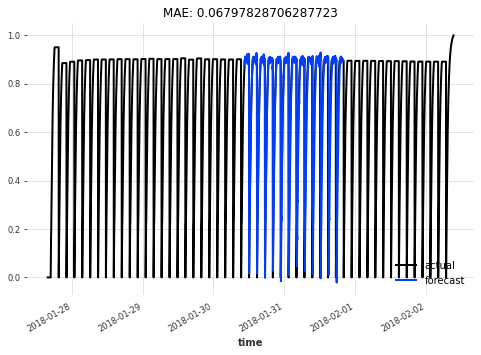

In [ ]:
def eval_model(model):
    pred_series = model.predict(n=1000)
    plt.figure(figsize=(8,5))
    series_en_transformed.plot(label='actual')
    pred_series.plot(label='forecast')
    plt.title('MAE: {}'.format(mae(pred_series, val)))
    plt.legend()
    
    
    
    
eval_model(model_nbeats)

In [ ]:
pred_series = model_nbeats.historical_forecasts(
    train,
    start=pd.Timestamp('1/29/2018  1:04:10 AM'), 
    forecast_horizon=850,
    stride=5,
    retrain=False,
    verbose=True
)

100%|██████████| 31/31 [00:06<00:00,  4.45it/s]


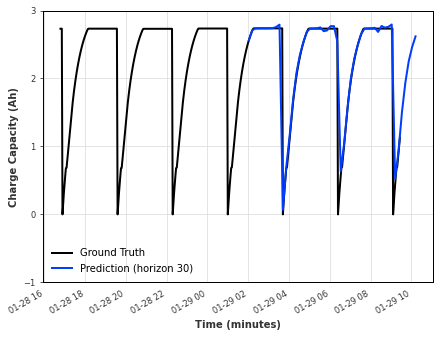

In [ ]:
plt.figure(figsize=(7,5),edgecolor="black")
ax = plt.axes()
ser[750:1250].plot(label='Ground Truth')
scaler_en.inverse_transform(pred_series)[0:50].plot(label=('Prediction (horizon 30)'))
plt.xlabel('Time (minutes)')
plt.ylabel('Charge Capacity (Ah)')
plt.yticks(np.arange(-1,4))
ax.spines['top'].set_visible(True)
ax.spines['right'].set_visible(True)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)
#plt.savefig("/content/drive/MyDrive/ChargeCapacity_dataset4_horizon30_nbeats.pdf",bbox_inches="tight")
#ser[750:1250].plot(label='Ground Truth')
#scaler_en.inverse_transform(pred_series)[0:50].plot(label=('Prediction (horizon 5)'))